In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [12]:
dataset_path = './data/lumen/train.parquet'
df = pd.read_parquet(dataset_path)
df.head()

,reservation_id,night_number,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,...,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id
0,73710,1.0,2007-12-13,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,...,4255.462,425.517,452.089,4564.690,265.428,26.572,43.800,0.000,3,10.0
1,73710,2.0,2007-12-14,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,...,4243.709,424.349,450.921,4552.937,265.428,26.572,43.800,0.000,3,10.0
2,74464,1.0,2008-01-01,106278,HR,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,...,4336.857,433.693,3806.147,19764.823,530.929,53.071,14897.037,3319.383,4,4.0
3,74461,1.0,2008-01-01,38936,GB,Cancelled,2007-12-29,2008-01-01,2008-01-02,1,...,8536.766,853.662,1012.948,10392.280,1592.714,159.286,262.800,0.000,5,3.0
4,74466,1.0,2008-01-01,106279,HR,Cancelled,2007-12-29,2008-01-01,2008-01-03,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,4.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31634 entries, 0 to 31633
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      31634 non-null  int64         
 1   night_number        31634 non-null  float64       
 2   stay_date           31634 non-null  datetime64[ns]
 3   guest_id            31634 non-null  int64         
 4   guest_country_id    31634 non-null  object        
 5   reservation_status  31634 non-null  object        
 6   reservation_date    31634 non-null  object        
 7   date_from           31634 non-null  object        
 8   date_to             31634 non-null  object        
 9   resort_id           31634 non-null  int64         
 10  cancel_date         6151 non-null   object        
 11  room_cnt            31634 non-null  int64         
 12  adult_cnt           31634 non-null  int64         
 13  children_cnt        31634 non-null  int64     

In [16]:
df.describe()

,reservation_id,night_number,stay_date,guest_id,resort_id,room_cnt,adult_cnt,children_cnt,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id
count,31634.000000,31634.000000,31634,31634.000000,31634.0,31634.000000,31634.000000,31634.000000,27860.000000,27860.000000,28076.000000,28076.000000,27860.000000,27860.000000,27860.000000,27860.000000,31634.000000,31634.000000
mean,82726.976102,4.928874,2009-01-04 07:23:16.800910336,66420.902067,1.0,2.581178,3.837169,0.000158,12366.242495,1236.536998,1530.393681,15810.696197,1283.381136,128.299446,2276.642024,176.647816,3.533287,4.894512
min,13685.000000,1.000000,2007-12-13 00:00:00,104.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,78400.250000,1.000000,2008-07-04 00:00:00,23589.000000,1.0,1.000000,1.000000,0.000000,1835.460000,183.540000,206.265000,2104.650000,170.910000,17.080000,51.100000,0.000000,2.000000,2.000000
50%,82905.500000,2.000000,2009-01-01 00:00:00,63575.000000,1.0,1.000000,1.000000,0.000000,5198.184000,519.833000,611.010000,6314.974500,623.785000,62.342000,244.550000,0.000000,3.000000,3.000000
75%,87132.750000,4.000000,2009-07-12 00:00:00,107000.750000,1.0,1.000000,2.000000,0.000000,15339.088500,1533.803000,1850.769000,18818.286750,1559.499000,155.855000,2002.463000,119.793000,5.000000,10.000000
max,91366.000000,226.000000,2009-12-31 00:00:00,149866.000000,1.0,60.000000,60.000000,1.000000,395442.387000,39544.976000,47315.680000,467782.613000,37741.730000,3773.370000,234320.145000,15441.325000,11.000000,18.000000
std,5023.282235,12.878147,NaN,42866.831472,0.0,5.172606,8.683641,0.012571,20590.179794,2059.042719,2622.469055,27079.984236,2488.930538,248.911415,5733.679232,507.996673,1.554350,3.574326


In [17]:
date_columns = ['stay_date', 'reservation_date', 'date_from', 'date_to', 'cancel_date']

for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31634 entries, 0 to 31633
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      31634 non-null  int64         
 1   night_number        31634 non-null  float64       
 2   stay_date           31634 non-null  datetime64[ns]
 3   guest_id            31634 non-null  int64         
 4   guest_country_id    31634 non-null  object        
 5   reservation_status  31634 non-null  object        
 6   reservation_date    31634 non-null  datetime64[ns]
 7   date_from           31634 non-null  datetime64[ns]
 8   date_to             31634 non-null  datetime64[ns]
 9   resort_id           31634 non-null  int64         
 10  cancel_date         6151 non-null   datetime64[ns]
 11  room_cnt            31634 non-null  int64         
 12  adult_cnt           31634 non-null  int64         
 13  children_cnt        31634 non-null  int64     

In [21]:
tax_columns = [col for col in df.columns if 'tax' in col]

df.drop(tax_columns, axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31634 entries, 0 to 31633
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      31634 non-null  int64         
 1   night_number        31634 non-null  float64       
 2   stay_date           31634 non-null  datetime64[ns]
 3   guest_id            31634 non-null  int64         
 4   guest_country_id    31634 non-null  object        
 5   reservation_status  31634 non-null  object        
 6   reservation_date    31634 non-null  datetime64[ns]
 7   date_from           31634 non-null  datetime64[ns]
 8   date_to             31634 non-null  datetime64[ns]
 9   resort_id           31634 non-null  int64         
 10  cancel_date         6151 non-null   datetime64[ns]
 11  room_cnt            31634 non-null  int64         
 12  adult_cnt           31634 non-null  int64         
 13  children_cnt        31634 non-null  int64     

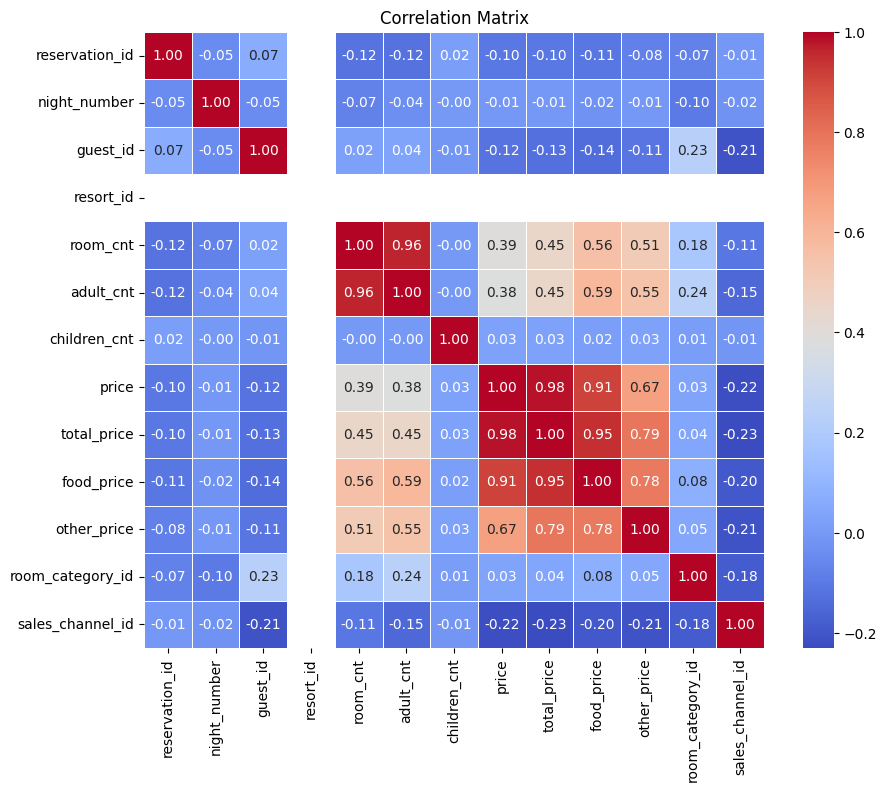

In [22]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
correlation_pairs = correlation_matrix.unstack()
sorted_pairs = correlation_pairs.sort_values(kind="quicksort", ascending=False)
unique_pairs = sorted_pairs.drop_duplicates()

strong_pairs = unique_pairs[unique_pairs != 1]
pd.set_option('display.max_colwidth', None)  
strong_pairs.head(20)

price             total_price         0.983633
room_cnt          adult_cnt           0.962714
food_price        total_price         0.946191
                  price               0.909408
other_price       total_price         0.792460
                  food_price          0.780839
price             other_price         0.672149
food_price        adult_cnt           0.591529
room_cnt          food_price          0.555576
other_price       adult_cnt           0.545382
                  room_cnt            0.506680
total_price       adult_cnt           0.450921
                  room_cnt            0.449966
room_cnt          price               0.394311
adult_cnt         price               0.384009
                  room_category_id    0.235622
guest_id          room_category_id    0.227948
room_category_id  room_cnt            0.182587
food_price        room_category_id    0.080965
reservation_id    guest_id            0.067179
dtype: float64

In [24]:
columns_to_remove = [col for col in df.columns if 'price' in col and 'total_price' not in col]
df.drop(columns_to_remove, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31634 entries, 0 to 31633
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      31634 non-null  int64         
 1   night_number        31634 non-null  float64       
 2   stay_date           31634 non-null  datetime64[ns]
 3   guest_id            31634 non-null  int64         
 4   guest_country_id    31634 non-null  object        
 5   reservation_status  31634 non-null  object        
 6   reservation_date    31634 non-null  datetime64[ns]
 7   date_from           31634 non-null  datetime64[ns]
 8   date_to             31634 non-null  datetime64[ns]
 9   resort_id           31634 non-null  int64         
 10  cancel_date         6151 non-null   datetime64[ns]
 11  room_cnt            31634 non-null  int64         
 12  adult_cnt           31634 non-null  int64         
 13  children_cnt        31634 non-null  int64     

### Handling Missing Values with KNN Imputation

In this section, we address the challenge of missing data in our dataset. Missing values can significantly impact the performance of machine learning models, leading to biased estimates or errors during the training process. To tackle this, we employ the KNN (K-Nearest Neighbors) imputation method, which estimates the missing values based on the most similar data points.

The KNN imputer operates under the assumption that a data point can be approximated by the values of its nearest neighbors. This method is particularly effective for datasets where the missingness is random, and similar observations are likely to have similar responses.

In [26]:
knn_imputer = KNNImputer(n_neighbors=5)

# List of columns you want to impute
columns_to_impute = ['total_price']

# Fit and transform the data
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31634 entries, 0 to 31633
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      31634 non-null  int64         
 1   night_number        31634 non-null  float64       
 2   stay_date           31634 non-null  datetime64[ns]
 3   guest_id            31634 non-null  int64         
 4   guest_country_id    31634 non-null  object        
 5   reservation_status  31634 non-null  object        
 6   reservation_date    31634 non-null  datetime64[ns]
 7   date_from           31634 non-null  datetime64[ns]
 8   date_to             31634 non-null  datetime64[ns]
 9   resort_id           31634 non-null  int64         
 10  cancel_date         6151 non-null   datetime64[ns]
 11  room_cnt            31634 non-null  int64         
 12  adult_cnt           31634 non-null  int64         
 13  children_cnt        31634 non-null  int64     

### Identifying invalid dates


In [28]:
mask = (df['stay_date'] >= df['date_from']) & (df['stay_date'] <= df['date_to'])
count_invalid_stays = (~mask).sum()

print(count_invalid_stays)

0


In [29]:
invalid_date_ranges = df[df['date_from'] > df['date_to']]
number_of_invalid_ranges = invalid_date_ranges.shape[0]

print(number_of_invalid_ranges)

0


In [30]:
invalid_reservation_ranges = df[(df['reservation_date'] > df['date_from'])]
number_of_invalid_reservations = invalid_reservation_ranges.shape[0]

print(number_of_invalid_reservations)

487


In [32]:
# Removing invalid reservations
df = df[~(df['reservation_date'] > df['date_from'])]

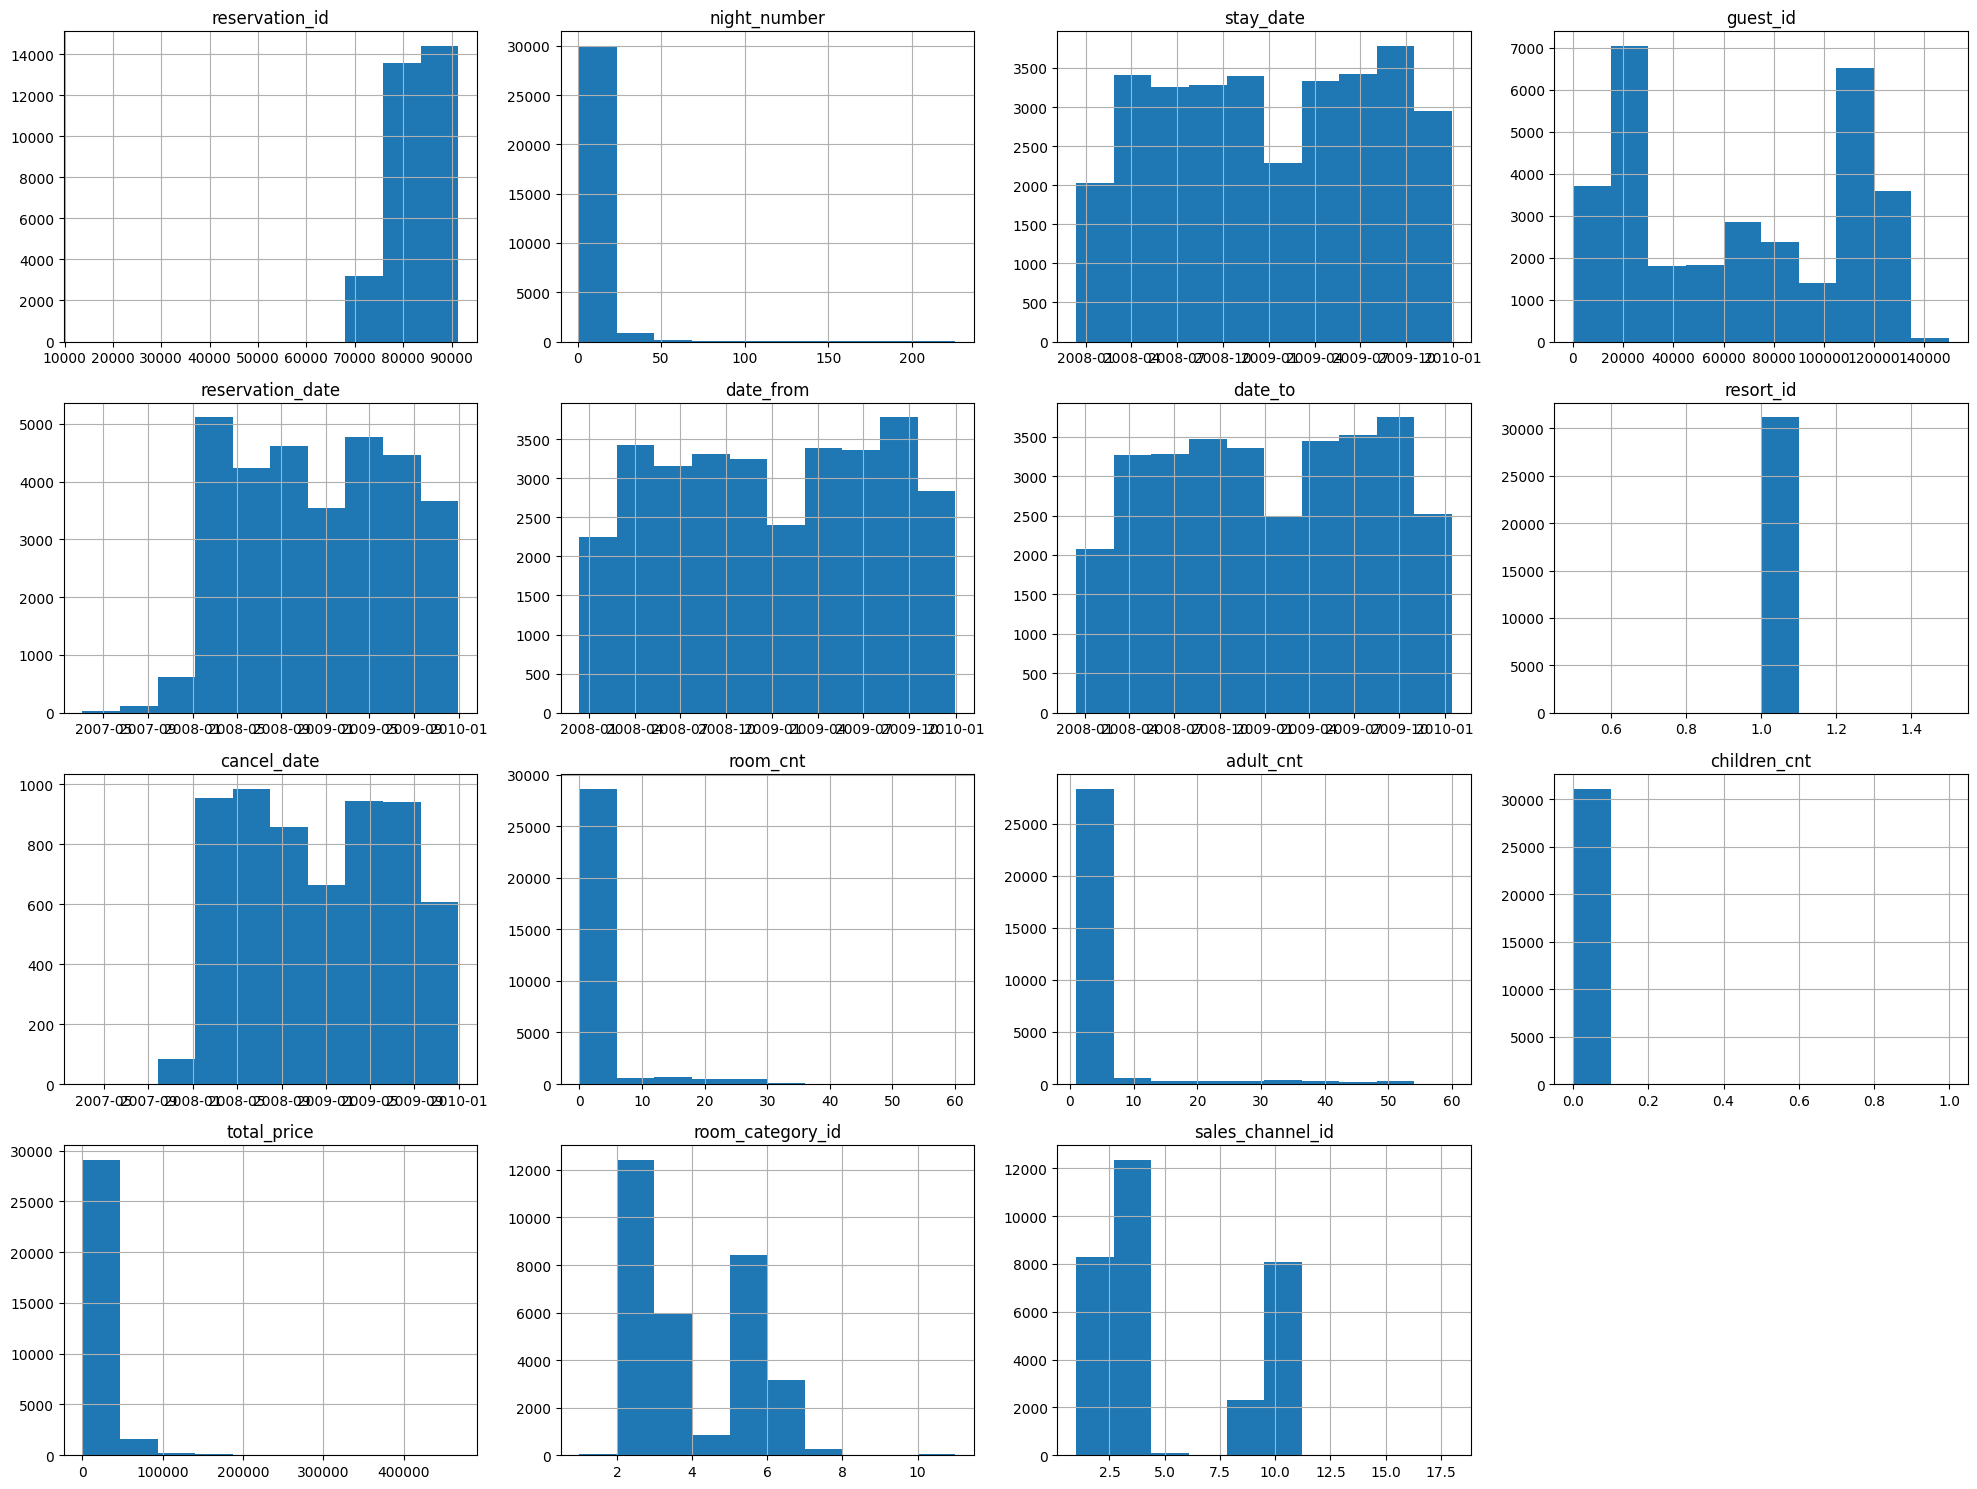

In [35]:
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

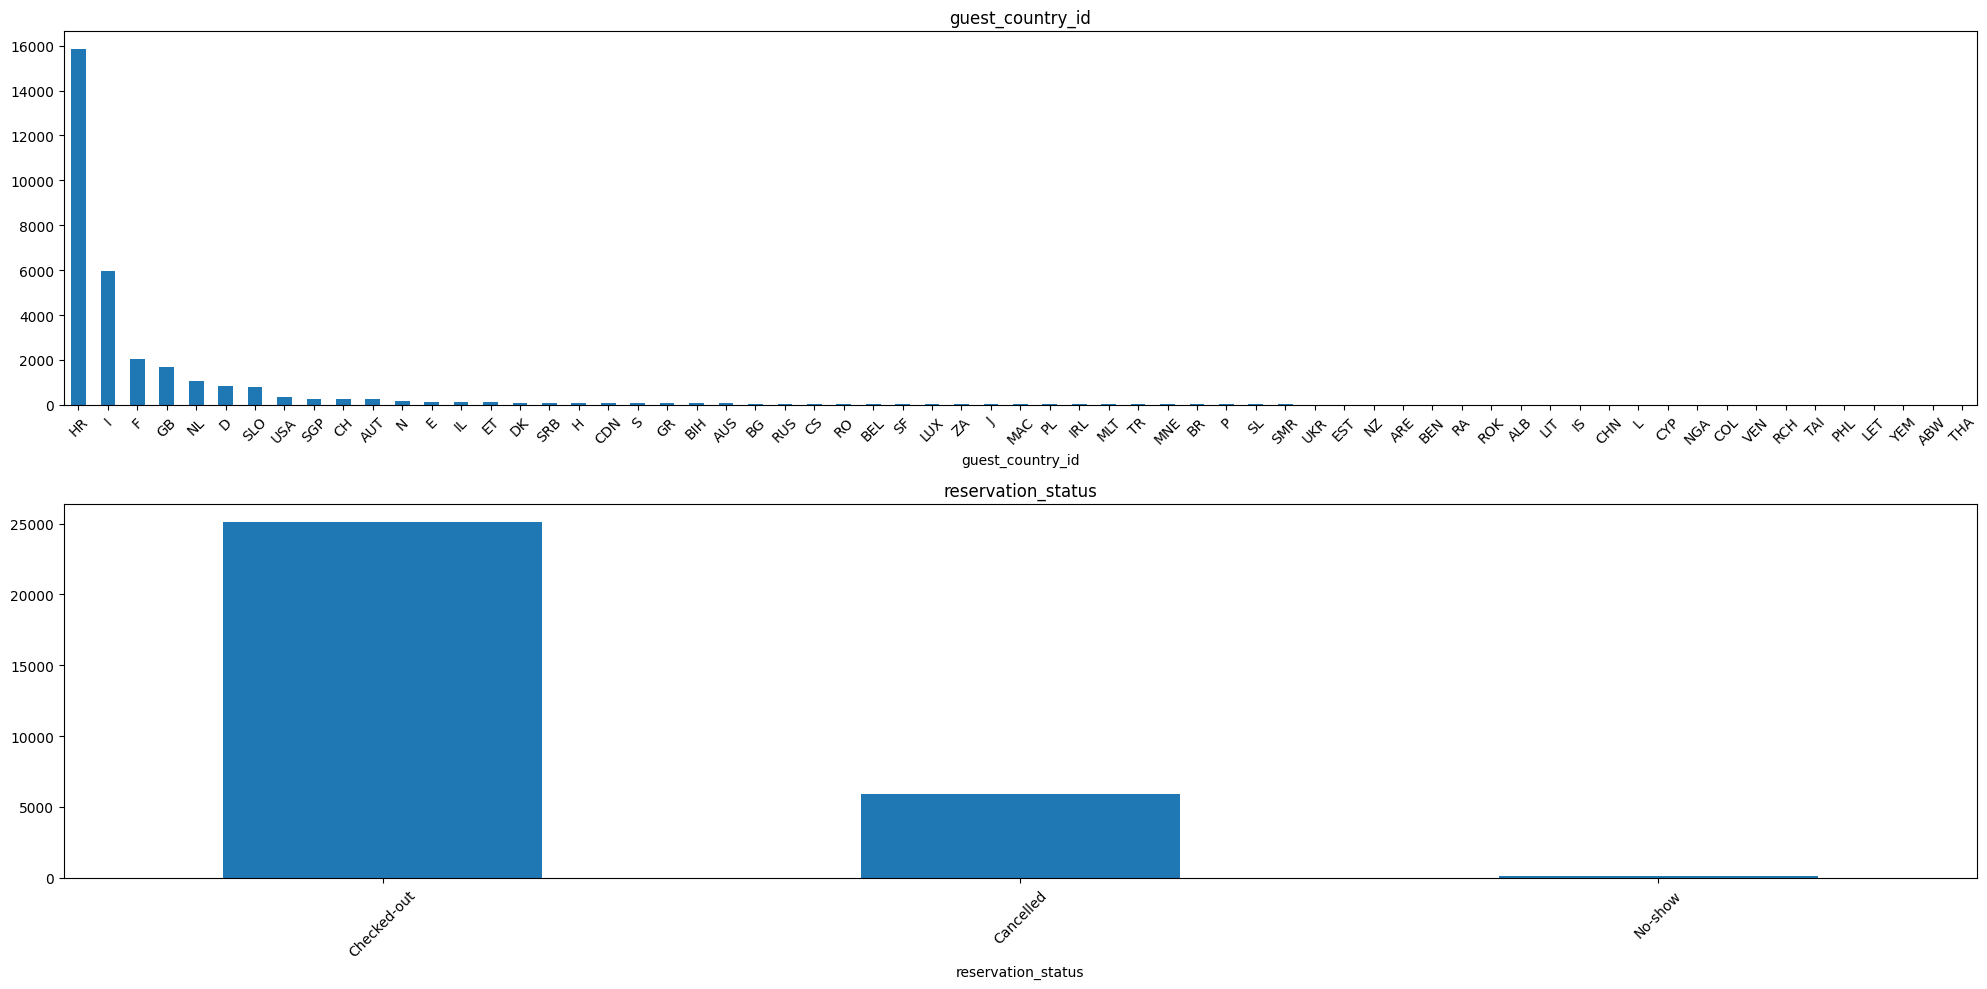

In [36]:
# Select columns of object type (typically string)
string_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 5 * len(string_columns)))
for i, column in enumerate(string_columns, 1):
    plt.subplot(len(string_columns), 1, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

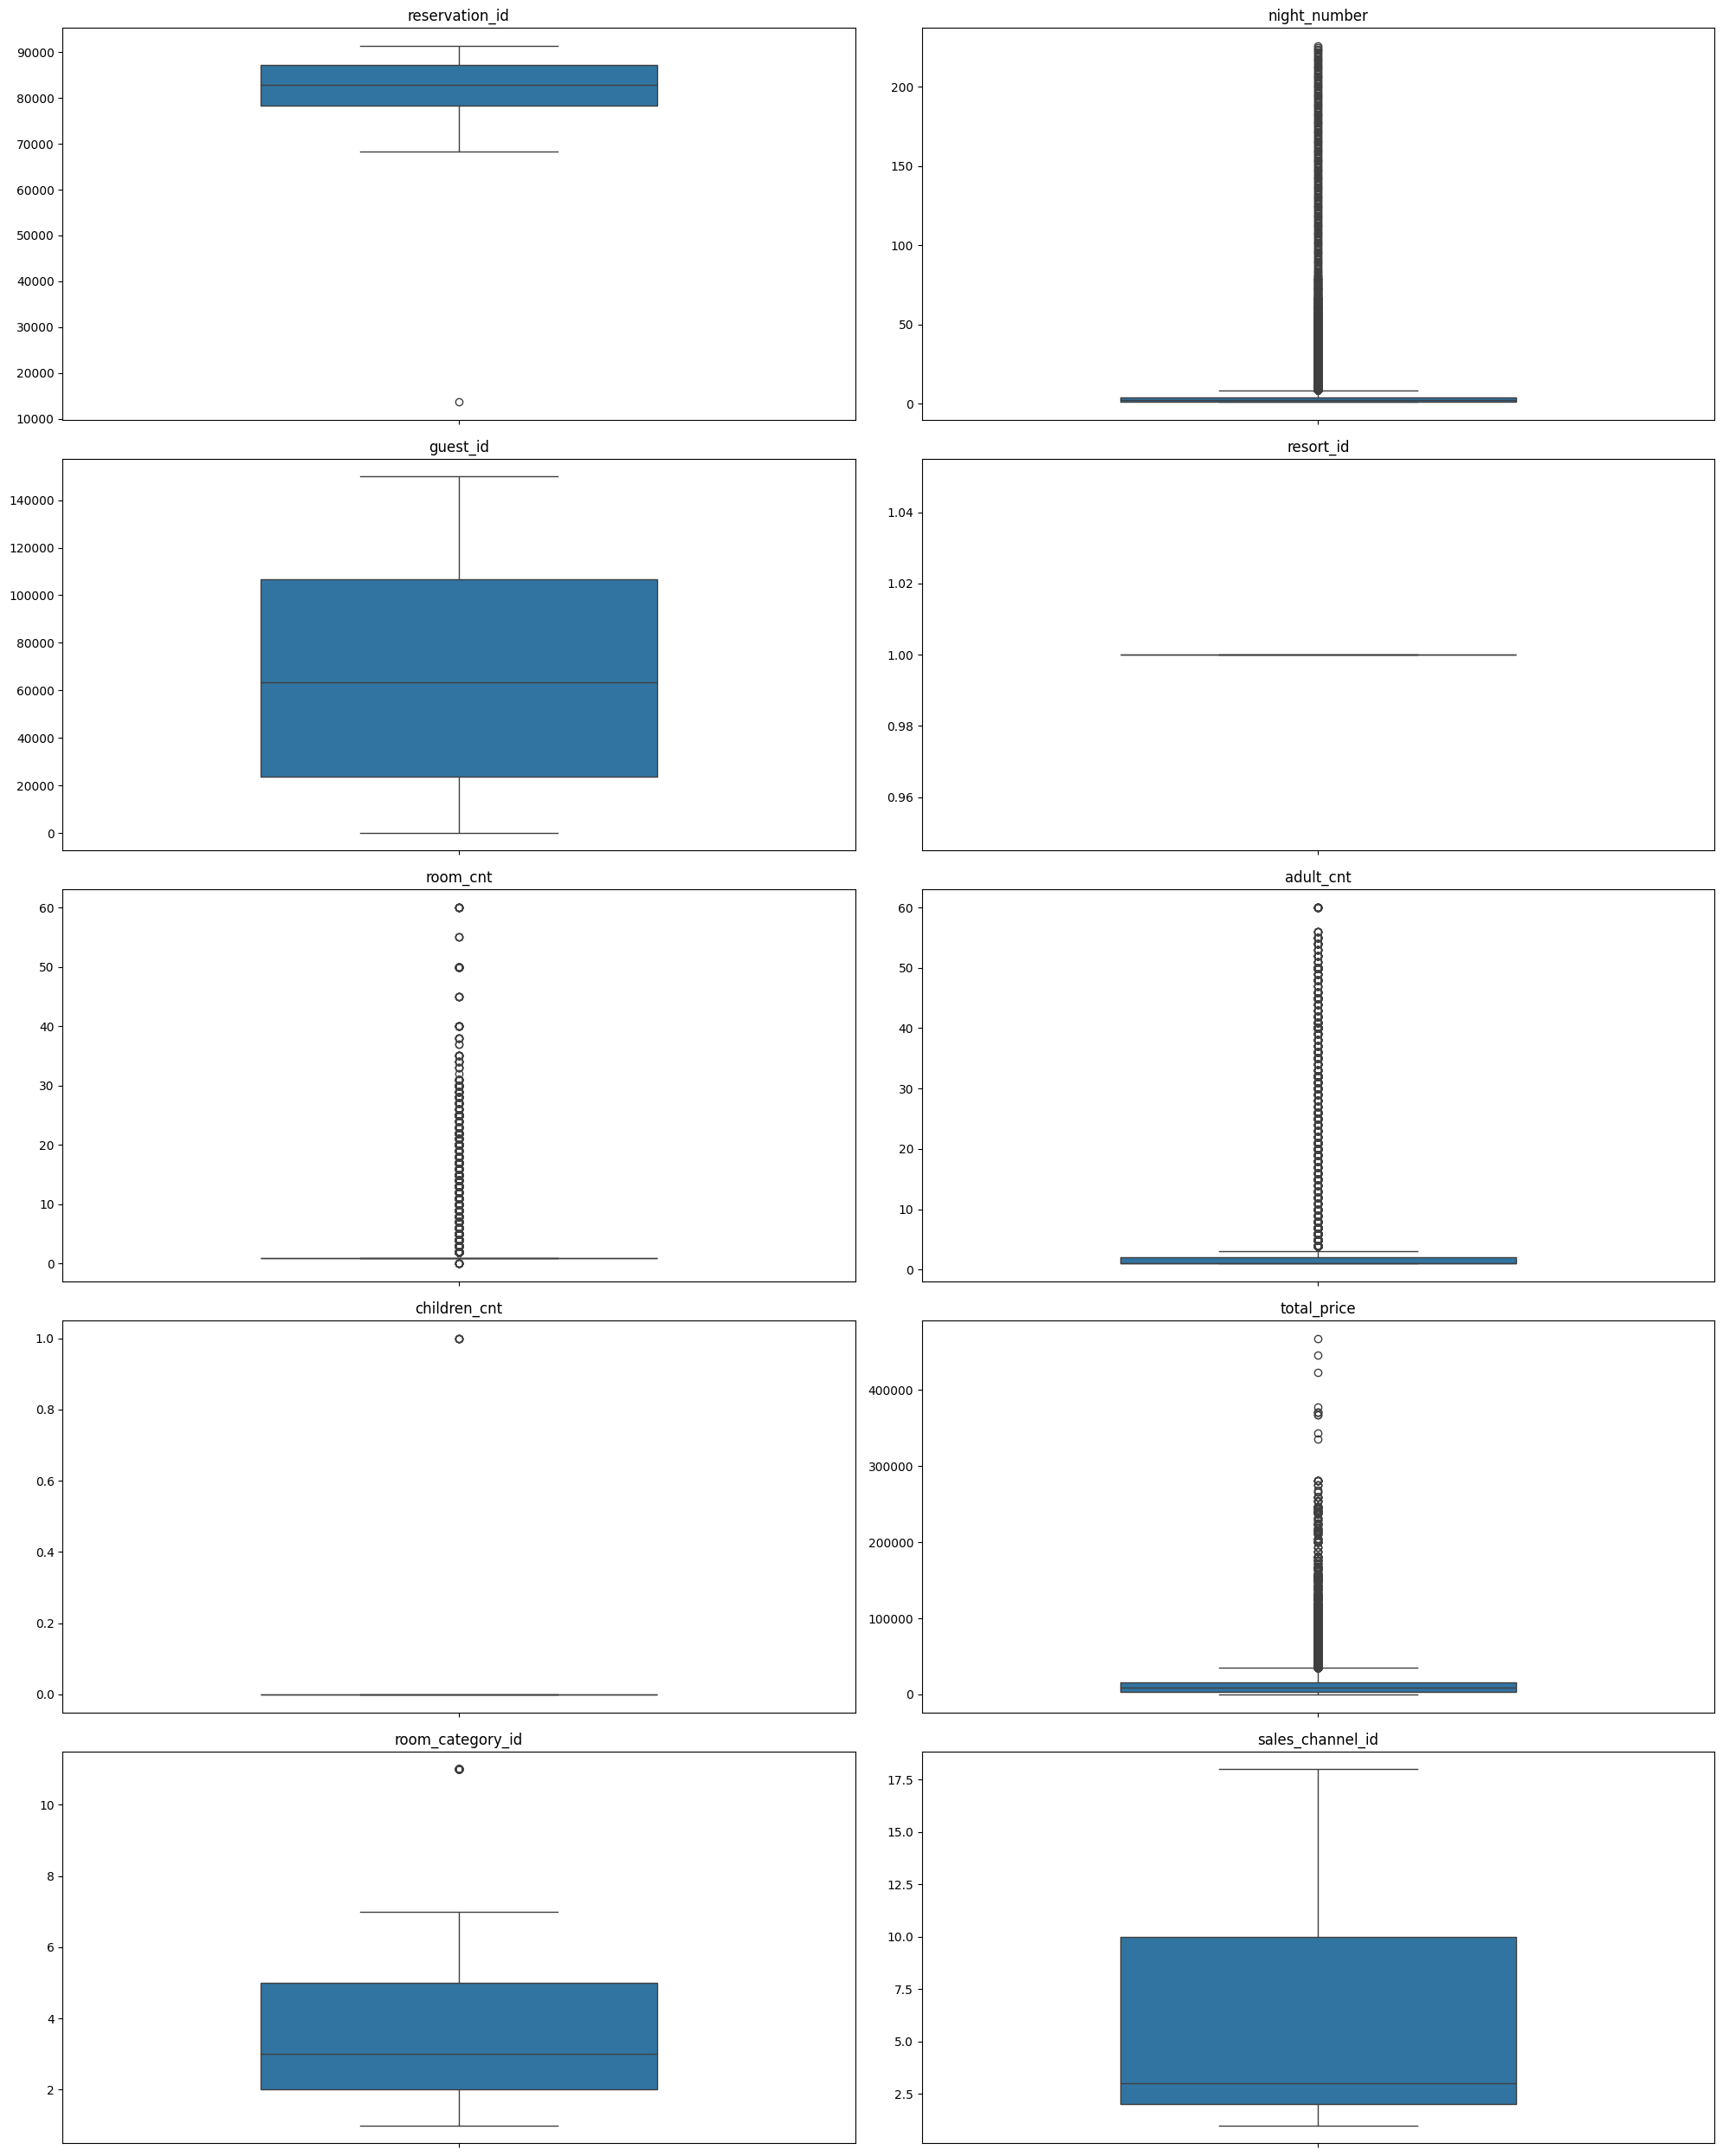

In [37]:
# Filtering only numeric columns for box plots
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the number of columns for subplots
num_of_columns = 2
num_of_rows = len(numeric_columns) // num_of_columns + (len(numeric_columns) % num_of_columns > 0)

fig, axes = plt.subplots(num_of_rows, num_of_columns, figsize=(20, 5 * num_of_rows))
axes = axes.flatten()  # Flatten in case of a single row

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df[column], ax=axes[i], width=0.5)
    axes[i].set_title(column)
    axes[i].set_ylabel('')  # Remove y-labels for cleanliness

# In case of an odd number of columns, remove the last subplot if unused
if len(numeric_columns) % num_of_columns:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [41]:
#df['total_guests'] = df['adult_cnt'] + df['children_cnt']
df['total_guests'] = df['room_cnt']

df['average_price_per_guest'] = df['total_price'] / df['total_guests']

# Then, group by 'stay_date' to calculate the total guests and average price per guest per day
guests_per_day = df.groupby('stay_date').agg(total_guests_per_day=('total_guests', 'sum'),
                                             average_price_per_guest=('average_price_per_guest', 'mean')).reset_index()

# The resulting DataFrame 'guests_per_day' will have three columns: 'stay_date', 'total_guests_per_day', and 'average_price_per_guest'
print(guests_per_day)

     stay_date  total_guests_per_day  average_price_per_guest
0   2007-12-13                     1              4564.690000
1   2007-12-14                     1              4552.937000
2   2008-01-01                    26              9381.995173
3   2008-01-02                     6              8489.671059
4   2008-01-03                    17              6758.643643
..         ...                   ...                      ...
728 2009-12-27                    20              2075.080916
729 2009-12-28                     6              2893.002820
730 2009-12-29                    81              2125.972819
731 2009-12-30                    77              2605.931946
732 2009-12-31                   230              3389.808217

[733 rows x 3 columns]


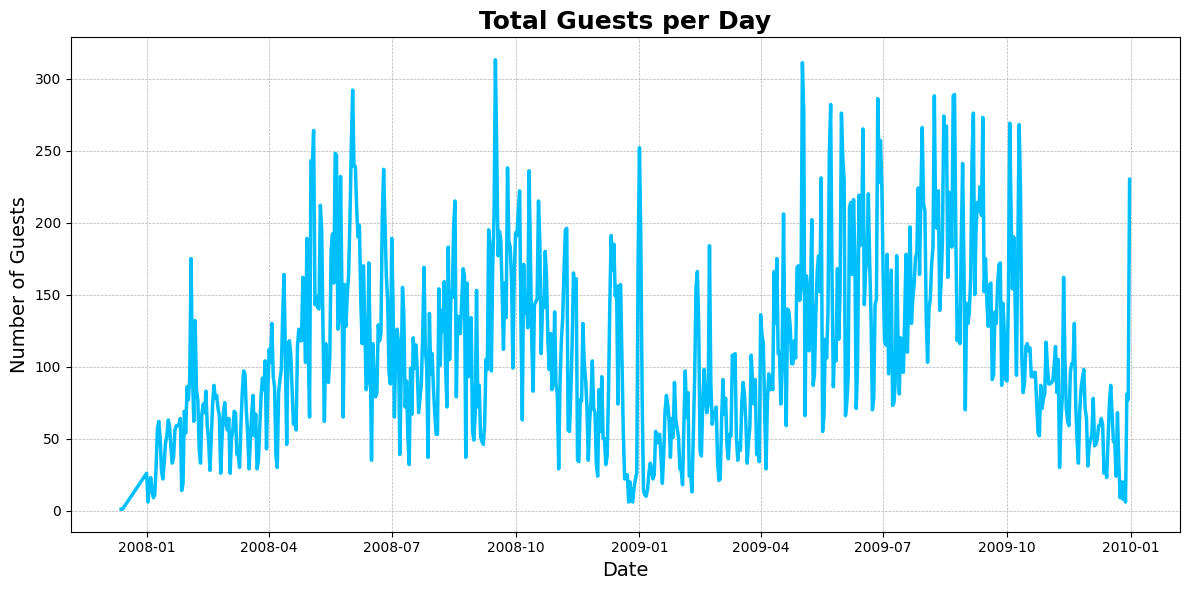

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=guests_per_day, x='stay_date', y='total_guests_per_day', color='deepskyblue', linewidth=2.5)
plt.title('Total Guests per Day', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Guests', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
